In [1]:
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [145]:
from IPython.display import Image

In [109]:
h2o.init(nthreads=-1, max_mem_size="10g", strict_version_check=True)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,11 hours 31 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_bobo_w32qao
H2O cluster total nodes:,1
H2O cluster free memory:,5.769 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
test = h2o.import_file(path = "violent_day_test.csv")
train = h2o.import_file(path = "violent_day_train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
train.head()

Round_lon,Round_lat,District,Year,Month,Last_month,Previous_occured,Adjacent_previous_occured,Last_occured,Crime_density,Total_density,Population..area.,Education.rate....,Housing..area.,Median.income,Foreign.born....,Poverty....,X15.19....,X20.24....,X25.29....,X30.34....,Median.age,White....,Black.or.African.American....,Asian....,Hispanic.or.Latino....,Householder..area.,Living.alone.householder....,Renter.occupied....,Response,BRONX,BROOKLYN,MANHATTAN,QUEENS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV
135,124,MANHATTAN,2010,AUG,0,0.350432,0.500883,2,83.5455,1377.84,1231.43,95.6,796.091,102703,0.232139,10.4,1.7,14.4,20.2,12.1,32.8,76.7,4.7,18.1,8.1,731.205,54.6,75.3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
154,93,BROOKLYN,2011,NOV,0,0.233122,0.259149,2,52.0111,723.361,848.688,84.2,420.188,52239,0.273952,20.8,6.2,9.1,11.1,9.4,34,14.4,79.1,3.8,10.9,362.391,38.5,83.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
184,183,BRONX,2009,DEC,0,0,0.41976,14,60.0956,468.96,1186.45,68.3,426.06,30339,0.402028,37.5,10,10.8,8.4,7.4,28.4,33.2,28.6,4.8,63.8,391.06,26.2,95.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,81,QUEENS,2013,JUN,0,0,0.00945409,46,2.31656,50.2614,221.091,89,74.4489,80758,0.397846,7,7.6,7.4,6.4,6.2,38.7,2.3,91.8,0.9,6.3,69.4716,17.4,31.3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
121,70,BROOKLYN,2012,SEP,0,0,0.0489815,13,14.3608,302.378,948.552,51.2,296.162,40576,0.561648,33.7,6.7,8.6,10,8.8,32.4,33.3,4,42.5,40.8,276.362,19.8,76,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
244,136,QUEENS,2012,MAY,0,0,0.000867238,14,5.74882,59.5032,238.383,88.8,93.5667,81846,0.424946,7.9,6.1,5.7,7.3,7.5,40.9,54.4,3.9,35.4,12.8,88.7083,26,44.3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
255,93,QUEENS,2010,FEB,1,0.633691,0.0741317,1,7.17885,98.8667,221.091,89,74.4489,80758,0.397846,7,7.6,7.4,6.4,6.2,38.7,2.3,91.8,0.9,6.3,69.4716,17.4,31.3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
201,201,BRONX,2007,AUG,1,0.645298,0.103355,1,51.9344,493.574,312.102,83.3,128.061,58839,0.34421,12.4,6.1,6.7,9.5,7.8,36.6,49.9,37.4,4.9,16.7,130.408,35.3,67.9,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
196,176,BRONX,2009,MAY,0,0.00426978,0.253374,6,25.8311,352.088,789.417,78.6,323.208,48315,0.323934,19.9,6.7,6.9,8.5,8.2,34.9,35.5,32,12.2,46.7,310.99,32.3,78.1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45,62,STATEN ISLAND,2010,MAR,0,0,0.134159,7,13.8302,125.473,205.758,81.1,71.2656,55198,0.252003,25.2,8.9,7.8,7,6.7,31.5,36.8,40.1,8.8,37.1,64.3672,19.7,45.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:
predictor = []
for i in range(5,45):
    if (i == 29):
        continue
    predictor.append(train.columns[i])

In [42]:
predictor

['Last_month',
 'Previous_occured',
 'Adjacent_previous_occured',
 'Last_occured',
 'Crime_density',
 'Total_density',
 'Population..area.',
 'Education.rate....',
 'Housing..area.',
 'Median.income',
 'Foreign.born....',
 'Poverty....',
 'X15.19....',
 'X20.24....',
 'X25.29....',
 'X30.34....',
 'Median.age',
 'White....',
 'Black.or.African.American....',
 'Asian....',
 'Hispanic.or.Latino....',
 'Householder..area.',
 'Living.alone.householder....',
 'Renter.occupied....',
 'BRONX',
 'BROOKLYN',
 'MANHATTAN',
 'QUEENS',
 'JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV']

In [43]:
response = "Response"

In [44]:
print(train.dim)
print(test.dim)

[572860, 45]
[396360, 45]


In [45]:
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [46]:
nfolds = 4

## Logistic regression

In [15]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [96]:
glm_model = H2OGeneralizedLinearEstimator(family='binomial',
                                         model_id='violent_day_glm_2',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True,
                                         nfolds = nfolds,
                                         fold_assignment = "Modulo",
                                         keep_cross_validation_predictions = True,
                                         seed = 1234)

# train 
glm_model.train(x=predictor, 
                y=response, 
                training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  violent_day_glm_2


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.16669165539309033
RMSE: 0.408278894131316
LogLoss: 0.5056467678269013
Null degrees of freedom: 572859
Residual degrees of freedom: 572828
Null deviance: 794152.5877106097
Residual deviance: 579329.6148346374
AIC: 579393.6148346374
AUC: 0.8346063633265638
Gini: 0.6692127266531276
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38861990813921354: 


,0,1,Error,Rate
0,190809.0,95621.0,0.3338,(95621.0/286430.0)
1,49873.0,236557.0,0.1741,(49873.0/286430.0)
Total,240682.0,332178.0,0.254,(145494.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3886199,0.7648042,245.0
max f2,0.2111222,0.8511852,325.0
max f0point5,0.5725646,0.7740450,165.0
max accuracy,0.4601967,0.7575097,212.0
max precision,0.9992412,1.0,0.0
max recall,0.0133150,1.0,399.0
max specificity,0.9992412,1.0,0.0
max absolute_mcc,0.4761269,0.5158586,205.0
max min_per_class_accuracy,0.4499610,0.7561254,217.0
max mean_per_class_accuracy,0.4601967,0.7575097,212.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100007,0.9981437,1.9745156,1.9745156,0.9872578,0.9872578,0.0197465,0.0197465,97.4515622,97.4515622
,2,0.0200014,0.9947232,1.9591552,1.9668354,0.9795776,0.9834177,0.0195929,0.0393395,95.9155175,96.6835399
,3,0.0300003,0.9909413,1.9151536,1.9496101,0.9575768,0.9748051,0.0191495,0.0584890,91.5153631,94.9610148
,4,0.0400010,0.9862835,1.9245942,1.9433559,0.9622971,0.9716779,0.0192473,0.0777363,92.4594170,94.3355880
,5,0.05,0.9805270,1.9067737,1.9360402,0.9533869,0.9680201,0.0190657,0.0968020,90.6773743,93.6040219
,6,0.1,0.9344862,1.8546940,1.8953671,0.9273470,0.9476836,0.0927347,0.1895367,85.4693992,89.5367105
,7,0.15,0.8762370,1.7762804,1.8556715,0.8881402,0.9278358,0.0888140,0.2783507,77.6280418,85.5671543
,8,0.2,0.8118517,1.6950738,1.8155221,0.8475369,0.9077611,0.0847537,0.3631044,69.5073840,81.5522117
,9,0.3,0.6752481,1.5373739,1.7228060,0.7686869,0.8614030,0.1537374,0.5168418,53.7373878,72.2806038
,10,0.4,0.5439262,1.3202179,1.6221590,0.6601089,0.8110795,0.1320218,0.6488636,32.0217854,62.2158992




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.16673430732624886
RMSE: 0.40833112461120186
LogLoss: 0.5057461964672889
Null degrees of freedom: 572859
Residual degrees of freedom: 572827
Null deviance: 794152.5877327437
Residual deviance: 579443.5322165021
AIC: 579509.5322165021
AUC: 0.834546744523253
Gini: 0.6690934890465059
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3781771538882932: 


,0,1,Error,Rate
0,185313.0,101117.0,0.353,(101117.0/286430.0)
1,46595.0,239835.0,0.1627,(46595.0/286430.0)
Total,231908.0,340952.0,0.2579,(147712.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3781772,0.7645581,246.0
max f2,0.2263628,0.8508772,317.0
max f0point5,0.5703778,0.7732849,164.0
max accuracy,0.4642912,0.7571344,207.0
max precision,0.9992399,0.9921576,0.0
max recall,0.0130964,1.0,399.0
max specificity,0.9992399,0.9998499,0.0
max absolute_mcc,0.4666399,0.5146000,206.0
max min_per_class_accuracy,0.4493719,0.7562197,214.0
max mean_per_class_accuracy,0.4642912,0.7571344,207.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100007,0.9980907,1.9745156,1.9745156,0.9872578,0.9872578,0.0197465,0.0197465,97.4515622,97.4515622
,2,0.0200014,0.9946303,1.9584570,1.9664863,0.9792285,0.9832431,0.0195859,0.0393325,95.8456973,96.6486298
,3,0.0300003,0.9907898,1.9144553,1.9491447,0.9572277,0.9745723,0.0191425,0.0584750,91.4455307,94.9144653
,4,0.0400010,0.9860892,1.9242451,1.9429195,0.9621225,0.9714597,0.0192438,0.0777188,92.4245069,94.2919485
,5,0.05,0.9802877,1.9064246,1.9356213,0.9532123,0.9678106,0.0190622,0.0967811,90.6424581,93.5621269
,6,0.1,0.9339974,1.8544845,1.8950529,0.9272423,0.9475264,0.0927242,0.1895053,85.4484516,89.5052893
,7,0.15,0.8757312,1.7754425,1.8551828,0.8877213,0.9275914,0.0887721,0.2782774,77.5442516,85.5182767
,8,0.2,0.8114208,1.6954230,1.8152428,0.8477115,0.9076214,0.0847711,0.3630486,69.5422965,81.5242817
,9,0.3,0.6749368,1.5370946,1.7225267,0.7685473,0.8612634,0.1537095,0.5167580,53.7094578,72.2526737
,10,0.4,0.5437813,1.3203226,1.6219757,0.6601613,0.8109879,0.1320323,0.6487903,32.0322592,62.1975701



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.7420330,0.0004722,0.7415704,0.7412282,0.742911,0.7424222
auc,0.83454,0.0001543,0.8346831,0.8347098,0.8341688,0.8345982
err,0.2579670,0.0004722,0.2584297,0.2587718,0.257089,0.2575778
err_count,36944.75,67.63205,37011.0,37060.0,36819.0,36889.0
f0point5,0.7261044,0.0008031,0.7246802,0.7254035,0.7276042,0.7267298
---,---,---,---,---,---,---
r2,0.3330744,0.0003222,0.33305,0.3336883,0.3324058,0.3331534
recall,0.8405474,0.0029700,0.847459,0.8397224,0.8361636,0.8388448
residual_deviance,144859.25,127.9371,145014.73,144561.34,144993.22,144867.67
rmse,0.4083275,0.0000986,0.4083350,0.4081396,0.4085322,0.4083034



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-04-14 11:15:34,0.000 sec,1,.47E0,0,1.3862944,nan,1.3862944,0.0
,2018-04-14 11:15:34,0.170 sec,3,.43E0,3,1.3616851,nan,1.3862944,0.0
,2018-04-14 11:15:34,0.358 sec,5,.39E0,3,1.3358075,nan,1.3862944,0.0
,2018-04-14 11:15:34,0.546 sec,7,.36E0,3,1.3118706,nan,1.3862944,0.0
,2018-04-14 11:15:35,0.801 sec,9,.33E0,5,1.2875226,nan,1.3642672,0.0001135
---,---,---,---,---,---,---,---,---,---
,2018-04-14 11:16:11,36.961 sec,101,.58E-3,33,1.0113981,nan,1.0116605,0.0007253
,2018-04-14 11:16:12,37.948 sec,102,.53E-3,33,1.0113583,nan,1.0115981,0.0007283
,2018-04-14 11:16:13,38.917 sec,103,.49E-3,35,1.0113232,nan,1.0115407,0.0007292
,2018-04-14 11:16:14,39.883 sec,104,.44E-3,35,1.0112935,nan,1.0114924,0.0007298



See the whole table with table.as_data_frame()


In [49]:
# measure train and test AUC
print(glm_model.auc(train=True))
print(glm_model.model_performance(test_data=test).auc())

0.8346063633265638
0.826614504314056


In [50]:
# print non-zero model parameters
for name, val in glm_model.coef().items():
    if val != 0.0:
        print(name, ': ', val)

Intercept :  0.14637996614033877
Last_month :  -0.17812774641820323
Previous_occured :  0.5191261200968518
Adjacent_previous_occured :  -0.27821276247661986
Last_occured :  -0.030465746345786682
Crime_density :  0.016825578424223112
Total_density :  0.0007593997152958094
Population..area. :  5.664434732256863e-05
Education.rate.... :  -0.006837109419223782
Median.income :  -1.3376236400716275e-06
Foreign.born.... :  0.5604082270040454
Poverty.... :  -0.01861448460380035
X20.24.... :  -0.003010663207240974
X30.34.... :  -0.001569386732432469
Median.age :  -0.012662435816895131
White.... :  -0.0015961874256330713
Asian.... :  -0.0037913572399312554
Hispanic.or.Latino.... :  0.001104007188769055
Living.alone.householder.... :  0.0053809959372093695
Renter.occupied.... :  0.0039519488541587015
BRONX :  -0.07328987314894748
BROOKLYN :  0.020131878087926235
MANHATTAN :  -0.20899961123847166
QUEENS :  -0.2001339810911477
JAN :  0.17634864232830527
FEB :  0.07893784999439961
MAR :  0.193997479

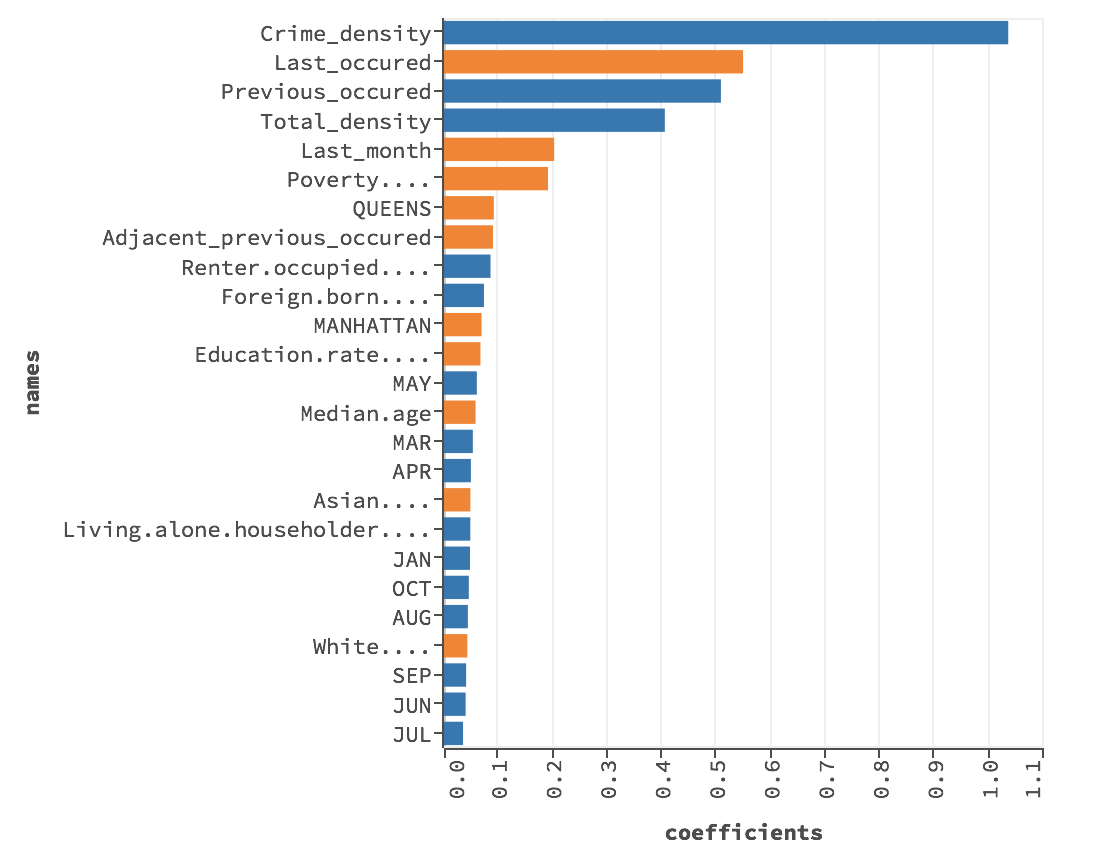

In [154]:
Image(filename="pic/violent_day_model/logistic.png")

In [149]:
%matplotlib inline

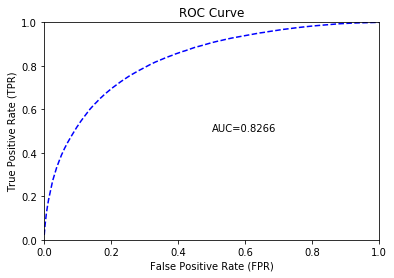

In [52]:
perf = glm_model.model_performance(test_data=test)
perf.plot()

In [53]:
prediction = glm_model.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [54]:
prediction['Round_lon'] = test['Round_lon']
prediction['Round_lat'] = test['Round_lat']
prediction['Year'] = test['Year']
prediction['Month'] = test['Month']
prediction['Actual'] = test[response]

In [55]:
threshold = 0.6334
prediction['predict'] = (prediction['p1'] >= threshold)

In [56]:
prediction = prediction.as_data_frame()

In [57]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,302616,38588
1,24708,30448


* Prediction Accuracy: 84.03%
* Sensitivity: 55.20%
* Specificity: 88.69%
* False Negative Rate: 44.80%
* False Positive Rate: 11.31%
* Precision: 44.10%
* Negative Predictive Value: 92.45%

In [58]:
prediction.to_csv('Violent_day_glm_cross.csv')

## Random forest model

In [59]:
import gc

In [97]:
gc.collect()

3753

In [98]:
# random forest
rf_model = H2ORandomForestEstimator(
    ntrees=300,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model_2',           # for easy lookup in flow
    nfolds = nfolds,
    fold_assignment = "Modulo",
    keep_cross_validation_predictions = True,
    seed=1234
    )             

# train rf model
rf_model.train(
    x=predictor,
    y=response,
    training_frame=train)

# print model information
rf_model

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model_2


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.17197306656656727
RMSE: 0.4146963546579199
LogLoss: 0.5365846289007672
Mean Per-Class Error: 0.25443912997940155
AUC: 0.8245606884846327
Gini: 0.6491213769692654
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3682016967644561: 


,0,1,Error,Rate
0,178645.0,107785.0,0.3763,(107785.0/286430.0)
1,45879.0,240551.0,0.1602,(45879.0/286430.0)
Total,224524.0,348336.0,0.2682,(153664.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3682017,0.7579202,248.0
max f2,0.1395682,0.8531785,343.0
max f0point5,0.6289511,0.7596587,148.0
max accuracy,0.5044848,0.7455609,195.0
max precision,0.9983812,0.9696527,1.0
max recall,0.0000707,1.0,399.0
max specificity,0.9999113,0.9985511,0.0
max absolute_mcc,0.5232582,0.4918709,188.0
max min_per_class_accuracy,0.4897930,0.7443354,201.0
max mean_per_class_accuracy,0.5044848,0.7455609,195.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0145027,1.0,1.9395763,1.9395763,0.9697882,0.9697882,0.0281290,0.0281290,93.9576312,93.9576312
,2,0.0200014,0.9984127,1.9466667,1.9415256,0.9733333,0.9707628,0.0107042,0.0388332,94.6666667,94.1525572
,3,0.0300265,0.9948980,1.9146787,1.9325621,0.9573394,0.9662810,0.0191949,0.0580281,91.4678739,93.2562060
,4,0.0400010,0.9889116,1.8844942,1.9205760,0.9422471,0.9602880,0.0187969,0.0768251,88.4494225,92.0576042
,5,0.05,0.9803848,1.8694134,1.9103446,0.9347067,0.9551723,0.0186922,0.0955172,86.9413408,91.0344587
,6,0.1000820,0.9354839,1.8140119,1.8621387,0.9070059,0.9310694,0.0908494,0.1863667,81.4011851,86.2138733
,7,0.15,0.8886244,1.7372360,1.8205728,0.8686180,0.9102864,0.0867193,0.2730859,73.7235977,82.0572798
,8,0.2,0.8381820,1.6519918,1.7784275,0.8259959,0.8892138,0.0825996,0.3556855,65.1991761,77.8427539
,9,0.3000017,0.7282828,1.5135022,1.6901181,0.7567511,0.8450590,0.1513529,0.5070384,51.3502191,69.0118062
,10,0.4000017,0.6083636,1.3039835,1.5935848,0.6519918,0.7967924,0.1303984,0.6374367,30.3983521,59.3584848




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.16831861366596326
RMSE: 0.41026651540914627
LogLoss: 0.5102255903748075
Mean Per-Class Error: 0.24978005097231437
AUC: 0.8308242929238677
Gini: 0.6616485858477354
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369616894102199: 


,0,1,Error,Rate
0,178397.0,108033.0,0.3772,(108033.0/286430.0)
1,43740.0,242690.0,0.1527,(43740.0/286430.0)
Total,222137.0,350723.0,0.2649,(151773.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3696169,0.7617950,248.0
max f2,0.1394109,0.8557128,341.0
max f0point5,0.6327932,0.7645019,147.0
max accuracy,0.4910492,0.7502199,202.0
max precision,0.9995028,1.0,0.0
max recall,0.0007213,1.0,399.0
max specificity,0.9995028,1.0,0.0
max absolute_mcc,0.5330035,0.5008292,186.0
max min_per_class_accuracy,0.4927676,0.7500471,201.0
max mean_per_class_accuracy,0.4910492,0.7502199,202.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100077,0.9987374,1.9623234,1.9623234,0.9811617,0.9811617,0.0196383,0.0196383,96.2323391,96.2323391
,2,0.0200014,0.9935343,1.9381659,1.9502531,0.9690830,0.9751265,0.0193695,0.0390078,93.8165939,95.0253098
,3,0.0300003,0.9850312,1.9141061,1.9382055,0.9570531,0.9691028,0.0191391,0.0581468,91.4106145,93.8205516
,4,0.0400045,0.9781583,1.8977491,1.9280883,0.9488745,0.9640442,0.0189854,0.0771323,89.7749084,92.8088319
,5,0.05,0.9700487,1.8847363,1.9194218,0.9423681,0.9597109,0.0188388,0.0959711,88.4736291,91.9421848
,6,0.1,0.9289948,1.8302552,1.8748385,0.9151276,0.9374193,0.0915128,0.1874839,83.0255211,87.4838529
,7,0.15,0.8835863,1.7473728,1.8323500,0.8736864,0.9161750,0.0873686,0.2748525,74.7372831,83.2349963
,8,0.2,0.8351364,1.6632336,1.7900709,0.8316168,0.8950354,0.0831617,0.3580142,66.3233600,79.0070872
,9,0.3,0.7268725,1.5248403,1.7016607,0.7624201,0.8508303,0.1524840,0.5104982,52.4840275,70.1660673
,10,0.4,0.6098487,1.3103027,1.6038212,0.6551513,0.8019106,0.1310303,0.6415285,31.0302692,60.3821178



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.7343557,0.0023108,0.7396362,0.7315016,0.7317739,0.7345111
auc,0.8308353,0.0004648,0.8318377,0.8309889,0.830131,0.8303835
err,0.2656443,0.0023108,0.2603638,0.2684984,0.2682261,0.2654890
err_count,38044.25,330.94577,37288.0,38453.0,38414.0,38022.0
f0point5,0.7171713,0.0028871,0.7239003,0.7135772,0.7142674,0.7169404
f1,0.7621831,0.0006097,0.7631816,0.7616426,0.7610654,0.7628427
f2,0.8132681,0.0026346,0.8069707,0.816651,0.8144256,0.8150250
lift_top_group,1.9630419,0.0031497,1.958231,1.9693303,1.9595118,1.9650944
logloss,0.5102256,0.0008692,0.5084751,0.5099987,0.5119120,0.5105165
max_per_class_error,0.3826275,0.0096556,0.3597922,0.3949559,0.3908137,0.3849484


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-14 21:40:32,24 min 25.979 sec,0.0,nan,nan,nan,nan,nan
,2018-04-14 21:40:36,24 min 30.041 sec,1.0,0.5322914,8.3102688,0.7006883,1.4131603,0.3169818
,2018-04-14 21:40:39,24 min 33.101 sec,2.0,0.5199976,7.2482797,0.7094127,1.4425079,0.3231445
,2018-04-14 21:40:42,24 min 36.166 sec,3.0,0.5092293,6.3493364,0.7191387,1.4643483,0.3222724
,2018-04-14 21:40:45,24 min 39.387 sec,4.0,0.4993171,5.5690525,0.7287033,1.4906464,0.3224317
---,---,---,---,---,---,---,---,---
,2018-04-14 21:44:21,28 min 14.961 sec,72.0,0.4149680,0.5393705,0.8241747,1.9376968,0.2712286
,2018-04-14 21:44:24,28 min 17.956 sec,73.0,0.4149097,0.5386381,0.8242199,1.9382603,0.2700450
,2018-04-14 21:44:27,28 min 21.058 sec,74.0,0.4148267,0.5378253,0.8243428,1.9383394,0.2676134
,2018-04-14 21:44:30,28 min 24.275 sec,75.0,0.4147597,0.5370701,0.8244418,1.9392068,0.2680271



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Crime_density,1504126.7500000,1.0,0.2348054
Total_density,1102029.6250000,0.7326707,0.1720350
Adjacent_previous_occured,895202.5,0.5951643,0.1397478
Previous_occured,609904.6875000,0.4054876,0.0952107
Last_occured,543164.9375000,0.3611165,0.0847921
---,---,---,---
X15.19....,25865.0058594,0.0171960,0.0040377
QUEENS,13925.0175781,0.0092579,0.0021738
BROOKLYN,5338.6953125,0.0035494,0.0008334
MANHATTAN,4671.1801758,0.0031056,0.0007292



See the whole table with table.as_data_frame()


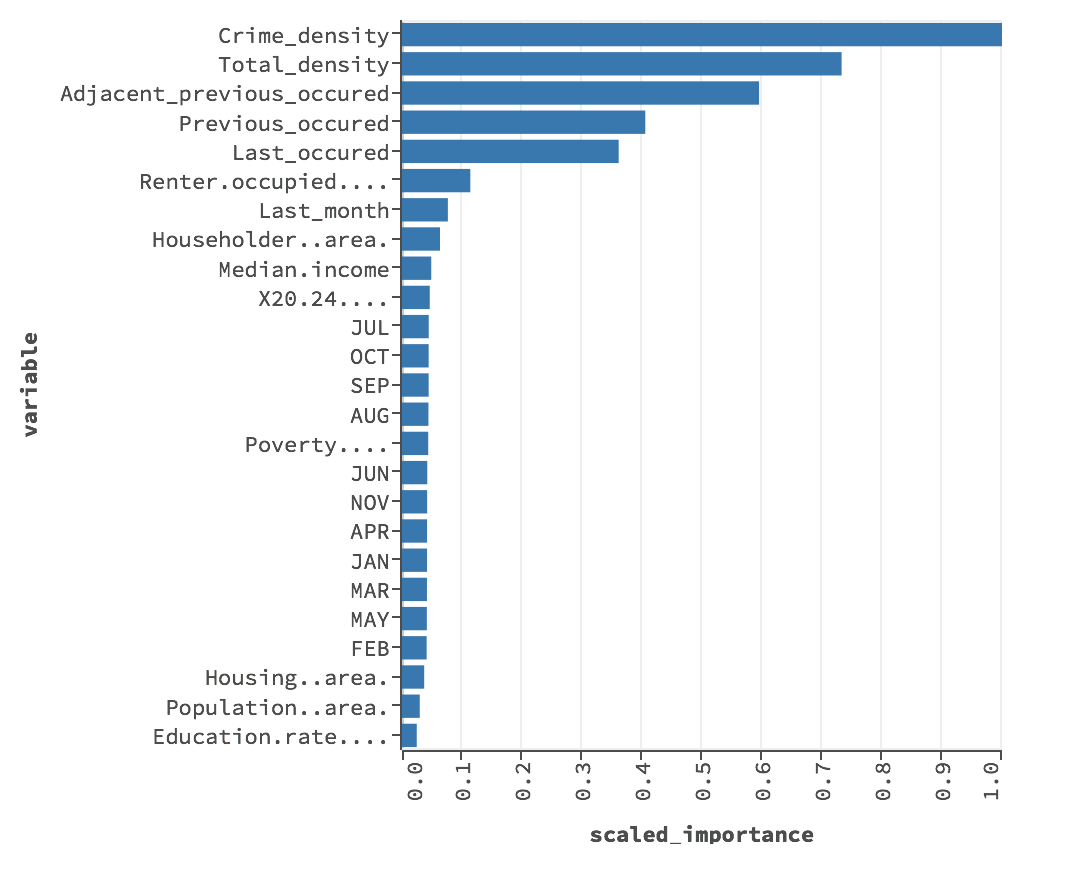

In [155]:
Image(filename="pic/violent_day_model/rf.png")

In [80]:
rf_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,Crime_density,1.504127e+06,1.000000,0.234805
1,Total_density,1.102030e+06,0.732671,0.172035
2,Adjacent_previous_occured,8.952025e+05,0.595164,0.139748
3,Previous_occured,6.099047e+05,0.405488,0.095211
4,Last_occured,5.431649e+05,0.361116,0.084792
5,Renter.occupied....,1.712512e+05,0.113854,0.026734
6,Last_month,1.150133e+05,0.076465,0.017954
7,Householder..area.,9.527184e+04,0.063340,0.014873
8,Median.income,7.332316e+04,0.048748,0.011446
9,X20.24....,6.960275e+04,0.046275,0.010866


In [81]:
print(rf_model.auc(train=True))
print(rf_model.model_performance(test_data=test).auc())

0.8245606884846327
0.8148323476815309


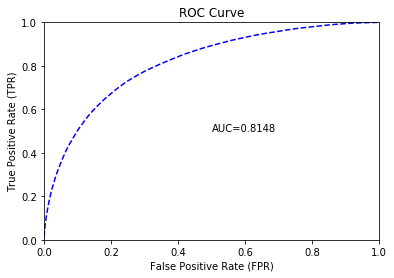

In [82]:
perf = rf_model.model_performance(test_data=test)
perf.plot()

In [83]:
prediction = rf_model.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [84]:
prediction['Round_lon'] = test['Round_lon']
prediction['Round_lat'] = test['Round_lat']
prediction['Year'] = test['Year']
prediction['Month'] = test['Month']
prediction['Actual'] = test[response]

In [85]:
prediction.head

predict,p0,p1,Round_lon,Round_lat,Year,Month,Actual
0,0.993235,0.00676509,1,3,2015,JAN,0
0,0.994545,0.00545485,1,3,2015,FEB,0
0,0.994294,0.00570641,1,3,2015,MAR,0
0,0.995304,0.00469642,1,3,2015,APR,0
0,0.993848,0.00615245,1,3,2015,MAY,0
0,0.992854,0.00714558,1,3,2015,JUN,0
0,0.993802,0.00619823,1,3,2015,JUL,0
0,0.996119,0.0038813,1,3,2015,AUG,0
0,0.991634,0.00836586,1,3,2015,SEP,0
0,0.994225,0.00577527,1,3,2015,OCT,0


<bound method H2OFrame.head of >

In [86]:
threshold = 0.7081
prediction['predict'] = (prediction['p1'] >= threshold)

In [87]:
prediction = prediction.as_data_frame()

In [88]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,304758,36446
1,26578,28578


* Prediction Accuracy: 84.10%
* Sensitivity: 51.81%
* Specificity: 89.32%
* False Negative Rate: 48.19%
* False Positive Rate: 10.68%
* Precision: 43.95%
* Negative Predictive Value: 91.98%

In [89]:
prediction.to_csv('Violent_day_rf_cross.csv')

## Neural network model

In [64]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=predictor,
              y=response,
              training_frame=train,
              validation_frame=valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [65]:
gsearch

               hidden input_dropout_ratio    l1     l2  \
0           [80, 190]                0.16   0.0  0.003   
1          [170, 320]                0.14  0.09  0.004   
2          [170, 320]                 0.1  0.09  0.001   
3    [50, 50, 50, 50]                 0.1  0.06  0.003   
4          [170, 320]                 0.1  0.06    0.0   
5      [320, 160, 80]                0.04  0.04  0.005   
6          [170, 320]                0.04   0.0  0.004   

                                                               model_ids  \
0  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
1  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
2  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
3  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
4  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
5  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_mod...   
6  

In [66]:
nn_model = gsearch.get_grid()[0]

# print model information
nn_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  Grid_DeepLearning_py_7_sid_8fc8_model_python_1523641250425_893_model_2


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2401739631053562
RMSE: 0.4900754667450271
LogLoss: 0.9562313027090366
Mean Per-Class Error: 0.2887002292784945
AUC: 0.7718038003241217
Gini: 0.5436076006482433
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3008718295906541: 


,0,1,Error,Rate
0,3025.0,2024.0,0.4009,(2024.0/5049.0)
1,1116.0,3899.0,0.2225,(1116.0/5015.0)
Total,4141.0,5923.0,0.312,(3140.0/10064.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3008718,0.7129274,276.0
max f2,0.0006349,0.8330507,398.0
max f0point5,0.8373491,0.7277615,99.0
max accuracy,0.8319156,0.7116455,101.0
max precision,0.9987824,0.9760192,1.0
max recall,0.0001755,1.0,399.0
max specificity,0.9996281,0.9980194,0.0
max absolute_mcc,0.8373491,0.4320030,99.0
max min_per_class_accuracy,0.6273452,0.7040877,178.0
max mean_per_class_accuracy,0.8319156,0.7112998,101.0


Gains/Lift Table: Avg response rate: 49.83 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100358,0.9998009,1.9670414,1.9670414,0.9801980,0.9801980,0.0197408,0.0197408,96.7041450,96.7041450
,2,0.0200715,0.9995226,1.9869106,1.9769760,0.9900990,0.9851485,0.0199402,0.0396810,98.6910555,97.6976003
,3,0.0300079,0.9990327,1.9265085,1.9602649,0.96,0.9768212,0.0191426,0.0588235,92.6508475,96.0264901
,4,0.0400437,0.9985425,1.9273032,1.9520040,0.9603960,0.9727047,0.0193420,0.0781655,92.7303239,95.2004038
,5,0.0500795,0.9978753,1.8478268,1.9311273,0.9207921,0.9623016,0.0185444,0.0967099,84.7826817,93.1127253
,6,0.1000596,0.9932193,1.8392156,1.8852170,0.9165010,0.9394240,0.0919242,0.1886341,83.9215554,88.5217040
,7,0.1500397,0.9867911,1.6955892,1.8220496,0.8449304,0.9079470,0.0847458,0.2733799,69.5589177,82.2049613
,8,0.2000199,0.9762117,1.6118071,1.7695151,0.8031809,0.8817685,0.0805583,0.3539382,61.1807123,76.9515101
,9,0.2999801,0.9247220,1.3824039,1.6405208,0.6888668,0.8174892,0.1381854,0.4921236,38.2403882,64.0520770
,10,0.4000397,0.8265382,1.1917123,1.5282629,0.5938431,0.7615499,0.1192423,0.6113659,19.1712252,52.8262901




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.2394840091010861
RMSE: 0.48937103418682854
LogLoss: 0.9677929968344258
Mean Per-Class Error: 0.28817242793826225
AUC: 0.7711507625063277
Gini: 0.5423015250126555
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23735858387100917: 


,0,1,Error,Rate
0,62652.0,44406.0,0.4148,(44406.0/107058.0)
1,23222.0,84202.0,0.2162,(23222.0/107424.0)
Total,85874.0,128608.0,0.3153,(67628.0/214482.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2373586,0.7134795,290.0
max f2,0.0002622,0.8338068,399.0
max f0point5,0.8987070,0.7332273,67.0
max accuracy,0.7920273,0.7116728,115.0
max precision,0.9996977,1.0,0.0
max recall,0.0002622,1.0,399.0
max specificity,0.9996977,1.0,0.0
max absolute_mcc,0.8503631,0.4332997,89.0
max min_per_class_accuracy,0.6179378,0.7051311,179.0
max mean_per_class_accuracy,0.8179166,0.7118276,104.0


Gains/Lift Table: Avg response rate: 50.09 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100008,0.9998395,1.9602913,1.9602913,0.9818182,0.9818182,0.0196046,0.0196046,96.0291250,96.0291250
,2,0.0200017,0.9995383,1.9491215,1.9547064,0.9762238,0.9790210,0.0194929,0.0390974,94.9121500,95.4706375
,3,0.0300025,0.9990984,1.9221279,1.9438469,0.9627040,0.9735820,0.0192229,0.0583203,92.2127935,94.3846895
,4,0.0400034,0.9985596,1.8969960,1.9321342,0.9501166,0.9677156,0.0189716,0.0772919,89.6995996,93.2134170
,5,0.0500042,0.9979096,1.8904803,1.9238034,0.9468531,0.9635431,0.0189064,0.0961982,89.0480308,92.3803398
,6,0.1000037,0.9933381,1.8165570,1.8701827,0.9098284,0.9366870,0.0908270,0.1870252,81.6557005,87.0182701
,7,0.1500033,0.9863801,1.7147166,1.8183623,0.8588213,0.9107326,0.0857350,0.2727603,71.4716615,81.8362283
,8,0.2000028,0.9763611,1.5849492,1.7600104,0.7938269,0.8815069,0.0792467,0.3520070,58.4949245,76.0010384
,9,0.3000019,0.9287490,1.4277203,1.6492488,0.7150783,0.8260315,0.1427707,0.4947777,42.7720343,64.9248758
,10,0.4000009,0.8271520,1.1591559,1.5267270,0.5805670,0.7646661,0.1159145,0.6106922,15.9155879,52.6726967



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-04-13 16:17:48,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-04-13 16:17:53,2 min 50.704 sec,19973 obs/sec,0.2807231,1,100605.0,0.6926750,3.3789920,0.7011956,1.9869106,0.3634738,0.6948058,3.4212684,0.7106691,1.9444674,0.3838317
,2018-04-13 16:18:13,3 min 10.782 sec,38706 obs/sec,2.5113260,9,900004.0,0.6998970,4.0004673,0.7008647,1.7087431,0.3962639,0.7014921,4.0385957,0.6842861,1.8020531,0.3442107
,2018-04-13 16:18:32,3 min 29.756 sec,42298 obs/sec,4.7402324,17,1698795.0,0.6830655,2.5480205,0.5101930,1.7683504,0.5016892,0.6872507,2.5727781,0.5054735,1.8346316,0.4991468
,2018-04-13 16:18:54,3 min 51.128 sec,43511 obs/sec,7.2503418,26,2598363.0,0.4900755,0.9562313,0.7718038,1.9670414,0.3120032,0.4893710,0.9677930,0.7711508,1.9602913,0.3153085
,2018-04-13 16:19:13,4 min 10.218 sec,45462 obs/sec,9.7603564,35,3497897.0,0.6972213,4.6575347,0.6243202,1.8279577,0.5016892,0.6994402,4.7098186,0.5578316,1.7359654,0.4991468
,2018-04-13 16:19:16,4 min 14.029 sec,45602 obs/sec,10.0385431,36,3597593.0,0.6293718,1.9141423,0.7352725,1.9471723,0.3852345,0.6330538,1.9482245,0.7299579,1.9714610,0.3687442
,2018-04-13 16:19:18,4 min 15.862 sec,45600 obs/sec,10.0385431,36,3597593.0,0.4900755,0.9562313,0.7718038,1.9670414,0.3120032,0.4893710,0.9677930,0.7711508,1.9602913,0.3153085


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
QUEENS,1.0,1.0,0.0443650
Total_density,0.8858179,0.8858179,0.0392993
BROOKLYN,0.8855906,0.8855906,0.0392893
Crime_density,0.8656181,0.8656181,0.0384032
Hispanic.or.Latino....,0.8474200,0.8474200,0.0375958
---,---,---,---
NOV,0.3972316,0.3972316,0.0176232
JUN,0.3888167,0.3888167,0.0172499
FEB,0.3853908,0.3853908,0.0170979
MAR,0.3626281,0.3626281,0.0160880



See the whole table with table.as_data_frame()


In [67]:
print(nn_model.auc(train=True))
print(nn_model.auc(valid=True))
print(nn_model.model_performance(test_data=test).auc())

0.7718038003241217
0.7711507625063277
0.766228555713017


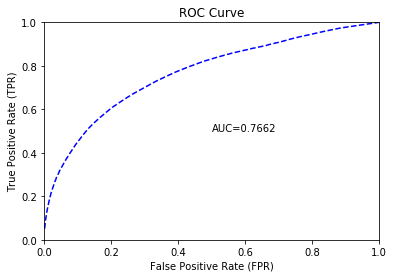

In [68]:
perf = nn_model.model_performance(test_data=test)
perf.plot()

In [69]:
prediction = nn_model.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [70]:
prediction['Actual'] = test[response]

In [71]:
threshold = 0.9318
prediction['predict'] = (prediction['p1'] >= threshold)

In [72]:
prediction = prediction.as_data_frame()

In [73]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,304291,36913
1,29438,25718


* Prediction Accuracy: 83.26%
* Sensitivity: 46.63%
* Specificity: 89.18%
* False Negative Rate: 53.37%
* False Positive Rate: 10.82%
* Precision: 41.06%
* Negative Predictive Value: 91.18%

In [74]:
prediction.to_csv('Violent_day_nn.csv')

## Stacked ensemble (glm and rf model)

In [73]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [100]:
ensemble = H2OStackedEnsembleEstimator(model_id="ensemble_model_2",
                                       base_models=[glm_model, rf_model],
                                       seed=1234)
ensemble.train(x=predictor, 
               y=response, 
               training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [102]:
print(ensemble.model_performance(train=True).auc())
print(ensemble.model_performance(test_data=test).auc())

0.9430696503157854
0.8292689269340595


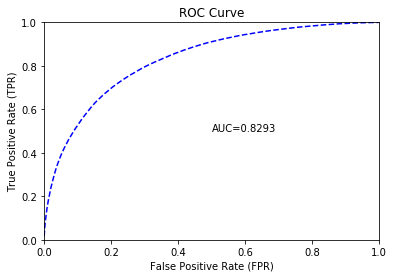

In [117]:
perf = ensemble.model_performance(test_data=test)
perf.plot()

In [103]:
prediction = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [104]:
prediction['Actual'] = test[response]

In [105]:
threshold = 0.5423
prediction['predict'] = (prediction['p1'] >= threshold)

In [106]:
prediction = prediction.as_data_frame()

In [107]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,275020,66184
1,17130,38026


* Prediction Accuracy: 78.98%
* Sensitivity: 68.94%
* Specificity: 80.60%
* False Negative Rate: 31.06%
* False Positive Rate: 19.40%
* Precision: 36.49%
* Negative Predictive Value: 94.14%

In [108]:
prediction.to_csv('Violent_day_ensemble.csv')

## GBM stacked ensemble

In [110]:
gc.collect()

443

In [113]:
# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600,
                   'seed':1234}

In [115]:
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(seed=1234,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=hyper_parameters,
                     search_criteria=search_criteria,
                     grid_id="gbm")
grid.train(x=predictor, 
           y=response, 
           training_frame=train)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [133]:
gbm_model = grid.get_grid()[0]
gbm_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model_0


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1599797984773119
RMSE: 0.39997474729951626
LogLoss: 0.48237898516773486
Mean Per-Class Error: 0.23649582795098278
AUC: 0.8462003050398064
Gini: 0.6924006100796127
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40092911931869324: 


,0,1,Error,Rate
0,193009.0,93421.0,0.3262,(93421.0/286430.0)
1,47098.0,239332.0,0.1644,(47098.0/286430.0)
Total,240107.0,332753.0,0.2453,(140519.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4009291,0.7730574,237.0
max f2,0.1789244,0.8606536,332.0
max f0point5,0.6197797,0.7787378,150.0
max accuracy,0.4932005,0.7635042,200.0
max precision,0.9853249,1.0,0.0
max recall,0.0283598,1.0,392.0
max specificity,0.9853249,1.0,0.0
max absolute_mcc,0.4932005,0.5270108,200.0
max min_per_class_accuracy,0.4932005,0.7619628,200.0
max mean_per_class_accuracy,0.4932005,0.7635042,200.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100007,0.9790301,1.9881306,1.9881306,0.9940653,0.9940653,0.0198827,0.0198827,98.8130564,98.8130564
,2,0.0200014,0.9703895,1.9605516,1.9743411,0.9802758,0.9871705,0.0196069,0.0394896,96.0551580,97.4341072
,3,0.0300003,0.9637109,1.9409916,1.9632259,0.9704958,0.9816129,0.0194079,0.0588975,94.0991620,96.3225882
,4,0.0400010,0.9570278,1.9305289,1.9550513,0.9652644,0.9775256,0.0193066,0.0782041,93.0528888,95.5051276
,5,0.05,0.9501921,1.9151536,1.9470726,0.9575768,0.9735363,0.0191495,0.0973536,91.5153631,94.7072583
,6,0.1,0.9083011,1.8652376,1.9061551,0.9326188,0.9530775,0.0932619,0.1906155,86.5237580,90.6155082
,7,0.15,0.8704039,1.7856370,1.8659824,0.8928185,0.9329912,0.0892818,0.2798974,78.5636979,86.5982381
,8,0.2,0.8253960,1.7054080,1.8258388,0.8527040,0.9129194,0.0852704,0.3651678,70.5407953,82.5838774
,9,0.3,0.7242247,1.5529798,1.7348858,0.7764899,0.8674429,0.1552980,0.5204657,55.2979786,73.4885778
,10,0.4,0.6050286,1.3250358,1.6324233,0.6625179,0.8162116,0.1325036,0.6529693,32.5035785,63.2423280




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1610935586014948
RMSE: 0.4013646205154296
LogLoss: 0.48543789443964686
Mean Per-Class Error: 0.23838110533114554
AUC: 0.844014407240345
Gini: 0.6880288144806901
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3759466408243206: 


,0,1,Error,Rate
0,183352.0,103078.0,0.3599,(103078.0/286430.0)
1,41754.0,244676.0,0.1458,(41754.0/286430.0)
Total,225106.0,347754.0,0.2528,(144832.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3759466,0.7716246,255.0
max f2,0.1681937,0.8597007,339.0
max f0point5,0.6113031,0.7757162,161.0
max accuracy,0.4912778,0.7616189,209.0
max precision,0.9868864,1.0,0.0
max recall,0.0088645,1.0,396.0
max specificity,0.9868864,1.0,0.0
max absolute_mcc,0.4912778,0.5232388,209.0
max min_per_class_accuracy,0.4912778,0.7606466,209.0
max mean_per_class_accuracy,0.4912778,0.7616189,209.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100007,0.9798918,1.9801012,1.9801012,0.9900506,0.9900506,0.0198024,0.0198024,98.0101239,98.0101239
,2,0.0200014,0.9710405,1.9542678,1.9671845,0.9771339,0.9835922,0.0195440,0.0393464,95.4267761,96.7184500
,3,0.0300003,0.9638853,1.9361034,1.9568253,0.9680517,0.9784127,0.0193590,0.0587054,93.6103352,95.6825323
,4,0.0400010,0.9569624,1.9242451,1.9486799,0.9621225,0.9743400,0.0192438,0.0779492,92.4245069,94.8679904
,5,0.05,0.9501108,1.9245810,1.9438606,0.9622905,0.9719303,0.0192438,0.0971930,92.4581006,94.3860629
,6,0.1,0.9095360,1.8602102,1.9020354,0.9301051,0.9510177,0.0930105,0.1902035,86.0210174,90.2035401
,7,0.15,0.8713012,1.7780959,1.8607222,0.8890479,0.9303611,0.0889048,0.2791083,77.8095870,86.0722224
,8,0.2,0.8261230,1.6994728,1.8204099,0.8497364,0.9102049,0.0849736,0.3640820,69.9472821,82.0409873
,9,0.3,0.7238387,1.5489299,1.7299166,0.7744650,0.8649583,0.1548930,0.5189750,54.8929931,72.9916559
,10,0.4,0.6060790,1.3227316,1.6281203,0.6613658,0.8140602,0.1322732,0.6512481,32.2731557,62.8120309



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
accuracy,0.7515309,0.0013559,0.7514087,0.7486855,0.7519673,0.7540621
auc,0.8440246,0.0002711,0.8441983,0.8444707,0.8434259,0.8440036
err,0.2484691,0.0013559,0.2485913,0.2513145,0.2480327,0.2459379
err_count,35584.5,194.18903,35602.0,35992.0,35522.0,35222.0
f0point5,0.7356729,0.0022087,0.7350028,0.7312386,0.736509,0.7399411
f1,0.7720069,0.0002712,0.7726013,0.7720756,0.7717477,0.7716031
f2,0.8121552,0.0030618,0.8142537,0.8177435,0.8105277,0.8060958
lift_top_group,1.9811584,0.0034541,1.9762874,1.9860572,1.9762597,1.9860294
logloss,0.4854379,0.0004245,0.4855001,0.4846056,0.4862966,0.4853493
max_per_class_error,0.3382885,0.0080014,0.3417914,0.3539409,0.3346880,0.3227338


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-04-14 22:53:36,3 min 52.756 sec,0.0,0.5,0.6931472,0.5,1.0,0.5
,2018-04-14 22:53:37,3 min 53.241 sec,1.0,0.4832371,0.6601201,0.8388273,1.9454455,0.2589114
,2018-04-14 22:53:37,3 min 53.544 sec,2.0,0.4692399,0.6331134,0.8411217,1.9619524,0.2527005
,2018-04-14 22:53:37,3 min 53.911 sec,3.0,0.4575248,0.6106983,0.8419698,1.9621812,0.2537653
,2018-04-14 22:53:38,3 min 54.283 sec,4.0,0.4477743,0.5919973,0.8424191,1.9757155,0.2513668
,2018-04-14 22:53:38,3 min 54.646 sec,5.0,0.4397010,0.5763536,0.8426831,1.9759642,0.2513930
,2018-04-14 22:53:38,3 min 55.006 sec,6.0,0.4330356,0.5632233,0.8428799,1.9773756,0.2496753
,2018-04-14 22:53:39,3 min 55.368 sec,7.0,0.4275196,0.5521180,0.8430658,1.9811584,0.2491673
,2018-04-14 22:53:39,3 min 55.726 sec,8.0,0.4228862,0.5425328,0.8432364,1.9833189,0.2487641
,2018-04-14 22:53:39,3 min 56.102 sec,9.0,0.4191259,0.5344975,0.8432782,1.9803701,0.2532521


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Crime_density,126373.6484375,1.0,0.6213555
Previous_occured,30810.0839844,0.2438015,0.1514874
Adjacent_previous_occured,23876.0175781,0.1889319,0.1173939
Total_density,17834.0488281,0.1411216,0.0876867
Last_occured,986.7663574,0.0078083,0.0048517
---,---,---,---
FEB,25.4515877,0.0002014,0.0001251
QUEENS,24.7354851,0.0001957,0.0001216
BROOKLYN,8.0754166,0.0000639,0.0000397
MANHATTAN,7.5471931,0.0000597,0.0000371



See the whole table with table.as_data_frame()


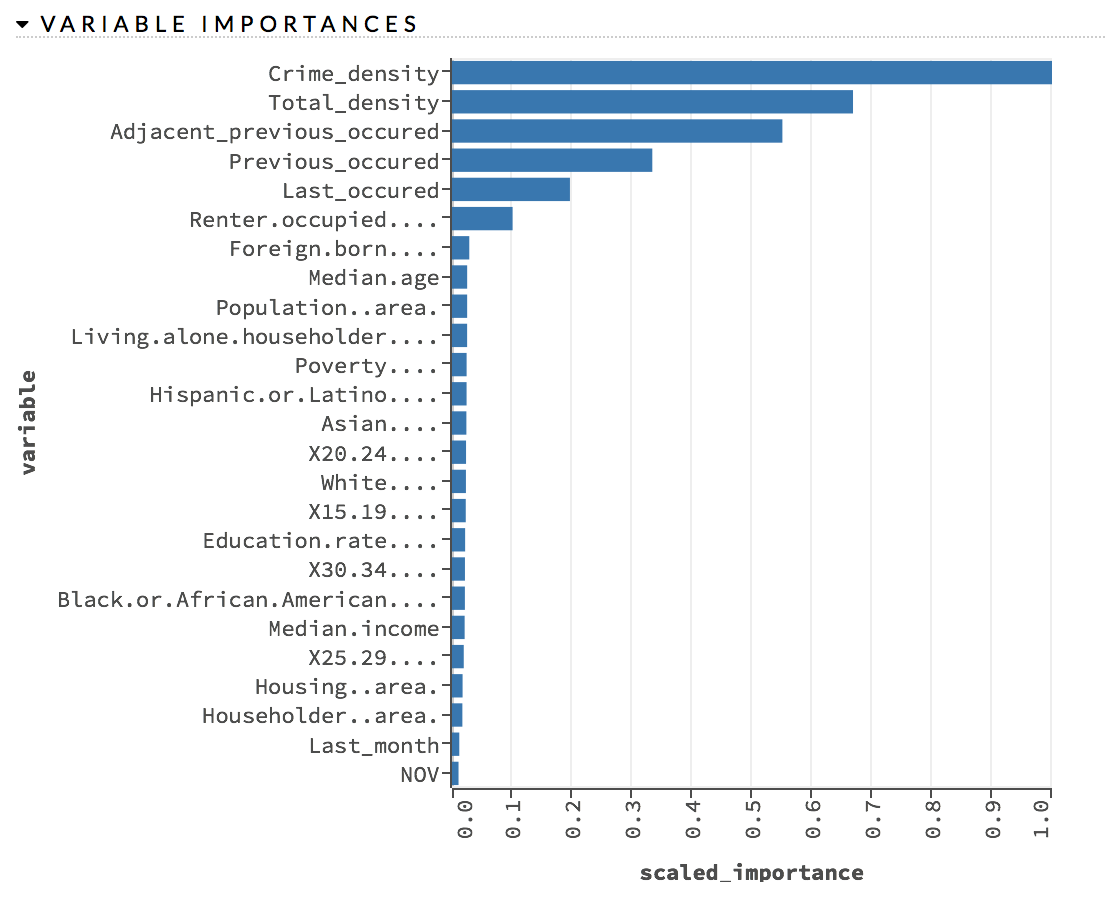

In [156]:
Image(filename="pic/violent_day_model/gbm.png")

In [135]:
print(gbm_model.auc(train=True))
print(gbm_model.model_performance(test_data=test).auc())

0.8462003050398064
0.8286136869336448


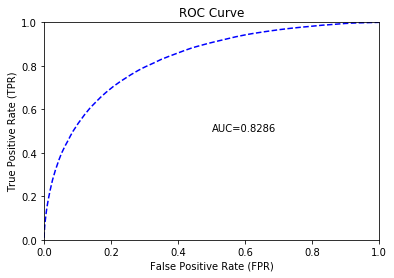

In [137]:
perf = gbm_model.model_performance(test_data=test)
perf.plot()

In [138]:
prediction = gbm_model.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [139]:
prediction['Actual'] = test[response]

In [140]:
threshold = 0.6886
prediction['predict'] = (prediction['p1'] >= threshold)

In [141]:
prediction = prediction.as_data_frame()

In [142]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,304077,37127
1,24789,30367


* Prediction Accuracy: 84.38%
* Sensitivity: 55.06%
* Specificity: 89.12%
* False Negative Rate: 44.94%
* False Positive Rate: 10.88%
* Precision: 44.99%
* Negative Predictive Value: 92.46%

In [143]:
prediction.to_csv('Violent_day_gbm_model.csv')

In [121]:
gbm_ensemble = H2OStackedEnsembleEstimator(model_id="ensemble_gbm",
                                           base_models=grid.model_ids,
                                           seed=1234)
gbm_ensemble.train(x=predictor, 
                   y=response, 
                   training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [130]:
gbm_ensemble

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  ensemble_gbm
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.14981414417415714
RMSE: 0.38705832141184765
LogLoss: 0.4603785018345666
Null degrees of freedom: 572859
Residual degrees of freedom: 572855
Null deviance: 794152.5877106097
Residual deviance: 527464.8571218995
AIC: 527474.8571218995
AUC: 0.8674339217879224
Gini: 0.7348678435758449
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3637370129381839: 


,0,1,Error,Rate
0,194907.0,91523.0,0.3195,(91523.0/286430.0)
1,40305.0,246125.0,0.1407,(40305.0/286430.0)
Total,235212.0,337648.0,0.2301,(131828.0/572860.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3637370,0.7887636,258.0
max f2,0.1747262,0.8703029,348.0
max f0point5,0.6353552,0.7971105,145.0
max accuracy,0.4948482,0.7803896,201.0
max precision,0.9264037,1.0,0.0
max recall,0.0846338,1.0,394.0
max specificity,0.9264037,1.0,0.0
max absolute_mcc,0.4948482,0.5608035,201.0
max min_per_class_accuracy,0.4882944,0.7799043,204.0
max mean_per_class_accuracy,0.4948482,0.7803896,201.0


Gains/Lift Table: Avg response rate: 50.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100007,0.9247221,2.0,2.0,1.0,1.0,0.0200014,0.0200014,100.0,100.0
,2,0.0200014,0.9214302,1.9975563,1.9987781,0.9987781,0.9993891,0.0199770,0.0399784,99.7556293,99.8778146
,3,0.0300003,0.9186175,1.9954609,1.9976725,0.9977304,0.9988363,0.0199525,0.0599309,99.5460894,99.7672524
,4,0.0400010,0.9160110,1.9811485,1.9935413,0.9905743,0.9967707,0.0198129,0.0797437,98.1148543,99.3541348
,5,0.05,0.9132045,1.9650838,1.9878504,0.9825419,0.9939252,0.0196488,0.0993925,96.5083799,98.7850435
,6,0.1,0.8943845,1.9201201,1.9539853,0.9600600,0.9769926,0.0960060,0.1953985,92.0120099,95.3985267
,7,0.15,0.8743098,1.8440806,1.9173504,0.9220403,0.9586752,0.0922040,0.2876026,84.4080578,91.7350371
,8,0.2,0.8459865,1.7269141,1.8697413,0.8634570,0.9348706,0.0863457,0.3739483,72.6914080,86.9741298
,9,0.3,0.7640145,1.5984708,1.7793178,0.7992354,0.8896589,0.1598471,0.5337953,59.8470831,77.9317809
,10,0.4,0.6347300,1.3536641,1.6729044,0.6768320,0.8364522,0.1353664,0.6691617,35.3664072,67.2904375


In [122]:
print(gbm_ensemble.model_performance(train=True).auc())
print(gbm_ensemble.model_performance(test_data=test).auc())

0.8674339217879224
0.8285694620441698


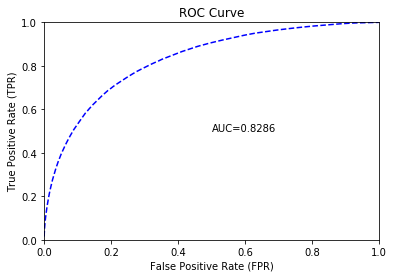

In [123]:
perf = gbm_ensemble.model_performance(test_data=test)
perf.plot()

In [124]:
prediction = gbm_ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [125]:
prediction['Actual'] = test[response]

In [126]:
threshold = 0.6964
prediction['predict'] = (prediction['p1'] >= threshold)

In [127]:
prediction = prediction.as_data_frame()

In [128]:
pd.crosstab(prediction['Actual'], prediction['predict'])

predict,0,1
Actual,,
0,298338,42866
1,22826,32330


* Prediction Accuracy: 83.43%
* Sensitivity: 58.62%
* Specificity: 87.44%
* False Negative Rate: 41.38%
* False Positive Rate: 12.56%
* Precision: 42.99%
* Negative Predictive Value: 92.89%

In [129]:
prediction.to_csv('Violent_day_gbm_ensemble.csv')

## Shutdown

In [144]:
h2o.cluster().shutdown(prompt=False)

H2O session _sid_92cb closed.
